In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
from sklearn import preprocessing
%matplotlib inline

In [4]:
data = pd.read_csv('train.csv',index_col='PassengerId')

In [4]:
#11
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.shape


(891, 11)

#12
Survived - бинарный
Pclass - порядковый
Name - категориальный
Sex - бинарный
Age - вещественный
SibSp - вещественный
Parch - вещественный
Ticket - множественный
Fare - вещественный
Cabin - категориальный
Embarked - категориальный

In [7]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
def clean_name(name):
    # Первое слово до запятой - фамилия
    s = re.search('^[^,]+, (.*)', name)
    if s:
        name = s.group(1)

    # Если есть скобки - то имя пассажира в них
    s = re.search('\(([^)]+)\)', name)
    if s:
        name = s.group(1)

    # Удаляем обращения
    name = re.sub('(Miss\. |Mrs\. |Ms\. )', '', name)

    # Берем первое оставшееся слово и удаляем кавычки
    name = name.split(' ')[0].replace('"', '')

    return name


names = data[data['Sex'] == 'female']['Name'].map(clean_name)
name_counts = names.value_counts()
name_counts.head()


Mary         15
Anna         15
Elizabeth    11
Margaret     10
Alice         6
Name: Name, dtype: int64

In [35]:
#13
data[data["Survived"] == 1]["Survived"].count()/data["Survived"].count()


0.3838383838383838

In [6]:
data[data["Survived"] == 1].groupby(["Sex"])["Survived"].count()["female"]/data["Survived"].count()


233

In [7]:
data[data["Survived"] == 1].groupby(["Sex"])["Survived"].count()["male"]/data["Survived"].count()

109

In [42]:
#14
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [554]:
#data[data["Pclass"]
series = data["Pclass"].value_counts()
series[series == series.max()].index[0]
data["Pclass"].value_counts()[data["Pclass"].value_counts() == data["Pclass"].value_counts().max()].tolist()[0]

491

In [558]:
data[data["Pclass"] == series[series == series.max()].index[0]].groupby(["Sex"])["Survived"].count()["male"]

347

In [559]:
data[data["Pclass"] == 3].groupby(["Sex"])["Survived"].count()["female"]

144

In [43]:
data.groupby(["Sex", "Pclass"])["Survived"].count()["female"]

Pclass
1     94
2     76
3    144
Name: Survived, dtype: int64

In [26]:
#15
data["Fare"].mean()

32.2042079685746

In [27]:
data["Fare"].min()

0.0

In [28]:
data["Fare"].max()

512.3292

In [33]:
data[data["Fare"] == data["Fare"].max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [411]:
data[data["Embarked"] == "S"]["Fare"].max()

263.0

In [37]:
data[data["Embarked"] == "S"]["Fare"].mean()

27.07981180124218

In [38]:
data[data["Embarked"] == "S"]["Fare"].min()

0.0

In [409]:
data[(data["Embarked"] == "S") & (data["Fare"] == data["Fare"].min())].count()

Survived    15
Pclass      15
Name        15
Sex         15
Age          7
SibSp       15
Parch       15
Ticket      15
Fare        15
Cabin        3
Embarked    15
dtype: int64

In [120]:
#16
df = data.drop('Cabin', 1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [129]:
#17
df.isnull().sum(axis = 0)

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [563]:
mode = df["Embarked"].value_counts()
mode


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [157]:
mean = data['Age'].mean()
data['Age'].fillna(mean, inplace = True)

data["Embarked"].fillna(mode[0], inplace = True)

In [159]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [78]:
#19
data[["Age", "Fare"]].corr()["Age"]["Fare"]



0.09156609328505784

Text(0.5, 1.0, 'Correlation')

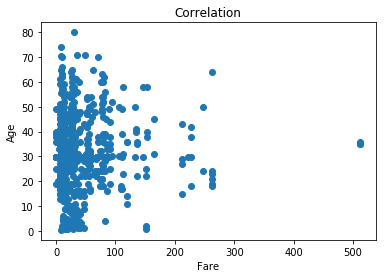

In [86]:
fig, ax = plt.subplots()
x_data = data["Fare"]
y_data = data["Age"]
ax.scatter(x_data, y_data)
ax.set_xlabel("Fare")
ax.set_ylabel("Age")
ax.set_title("Correlation")

In [160]:
data[["Survived", "Fare"]].corr()["Survived"]["Fare"]

0.2573065223849618

Text(0.5, 1.0, 'Correlation')

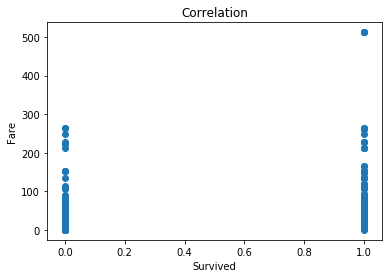

In [164]:
fig, ax = plt.subplots()
x_data = data["Survived"]
y_data = data["Fare"]
ax.scatter(x_data, y_data)
ax.set_xlabel("Survived")
ax.set_ylabel("Fare")
ax.set_title("Correlation")

In [169]:
data[["Pclass", "Survived"]].corr()

Pclass     -0.338481
Survived   -0.338481
dtype: float64

In [187]:
data["Siblings"] = data["Parch"] + data["SibSp"] + 1
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Siblings
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [570]:
data["Name1"] = data["Name"].apply(lambda k: k.split(',')[0])

In [219]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Siblings,Name1
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,Braund
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2,Cumings
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Heikkinen
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2,Futrelle
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,Allen
6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,1,Moran
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,McCarthy
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,5,Palsson
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,3,Johnson


In [196]:
data["Name1"].isnull().sum()

0

In [283]:
def search_in_string(string ):
    result = re.sub(r'(\S+\s+)\d\w+$', '#', string)
    print re.search()
    return result

search_in_string('a/5 2131')

SyntaxError: invalid syntax (<ipython-input-283-f692b0e6b394>, line 3)

In [286]:
def search_in_string(string):
    new_string = str(string)
    result = re.search(r'(\w+$)', new_string)
    st = result.group(1)
    return st

In [296]:
dt = data["Ticket"].apply(lambda y: re.search(r'(\w+$)', y).group(0))


In [299]:
categoricals = df.select_dtypes(include=['object']).columns
categoricals

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

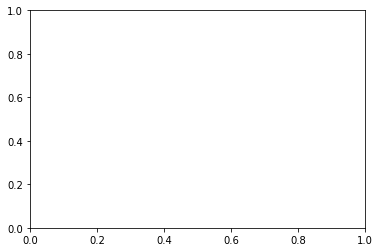

In [301]:
fig, ax = plt.subplots()

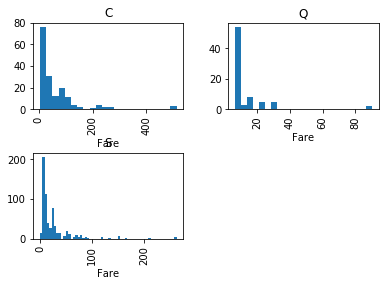

In [569]:
df2 = df[["Fare", 'Embarked']] 

d = df2.hist(column='Fare', by='Embarked', xlabelsize = 10, bins = 'auto')

for ax in d.flatten():
    ax.set_xlabel("Fare")


(array([107.,  32.,  17.,   0.,   7.,   2.,   0.,   0.,   0.,   3.]),
 array([  4.0125 ,  54.84417, 105.67584, 156.50751, 207.33918, 258.17085,
        309.00252, 359.83419, 410.66586, 461.49753, 512.3292 ]),
 <a list of 10 Patch objects>)

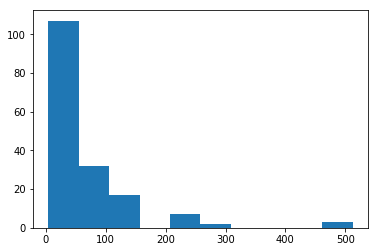

In [426]:
fig, ax = plt.subplots()
x_data = df[df['Embarked'] == 'C']["Fare"]

y_data = df[df['Embarked'] == 'C']["Embarked"]

ax.hist(x_data)


In [349]:
import re

text = "O'Cumings II, Mrs. John Bradley (Florence \"Briggs\" Thayer)"
#text = "de Mulder, Mr. Theodore"
print(text)

result = re.split(r'[,\(\)]', text)
print(result)
print(re.findall(r'([^.]+)\s*$', result[1]))

O'Cumings II, Mrs. John Bradley (Florence "Briggs" Thayer)
["O'Cumings II", ' Mrs. John Bradley ', 'Florence "Briggs" Thayer', '']
[' John Bradley ']


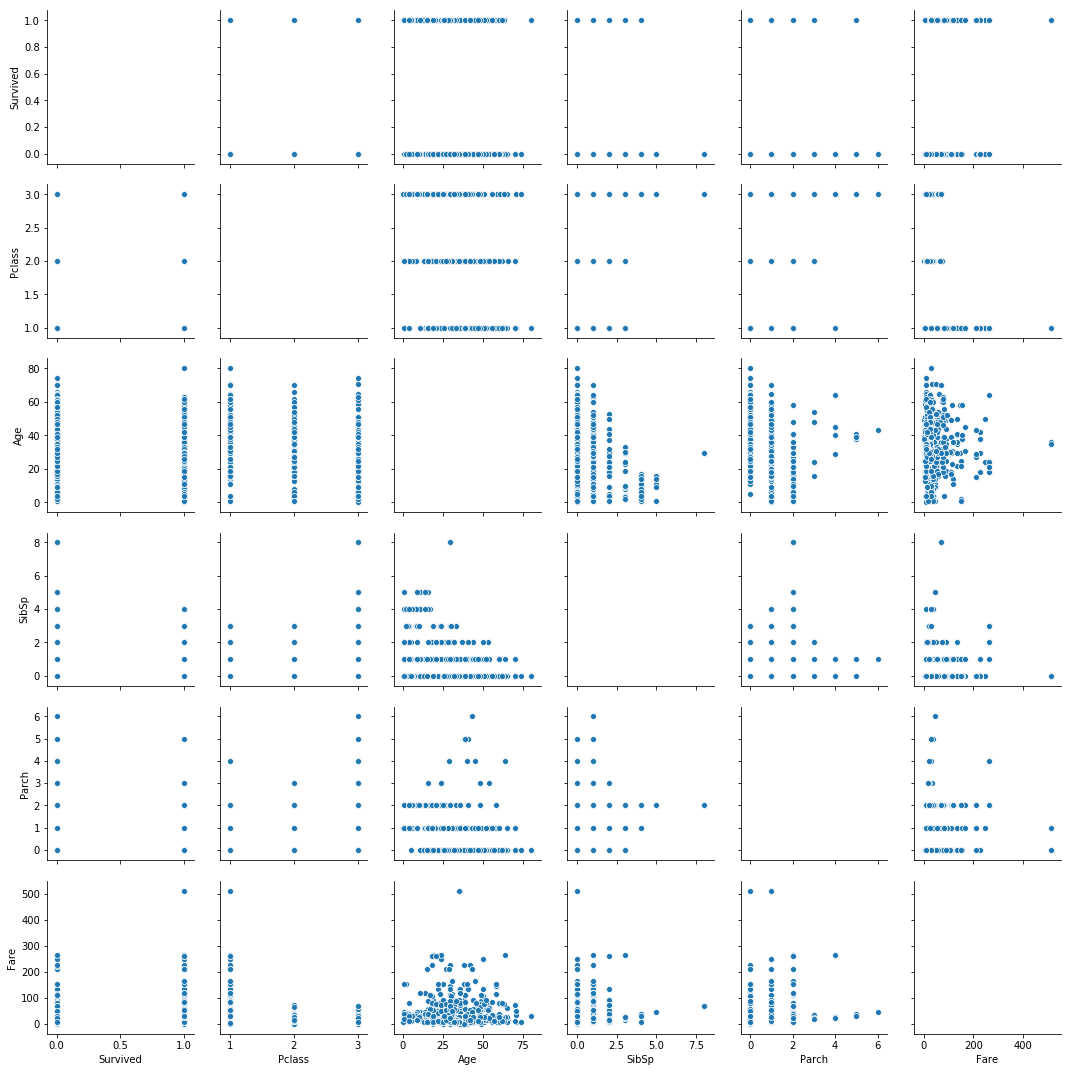

In [501]:
nominals = df.select_dtypes(exclude=['object'])
sns.pairplot(df, vars = nominals, diag_kind = {'hist'})

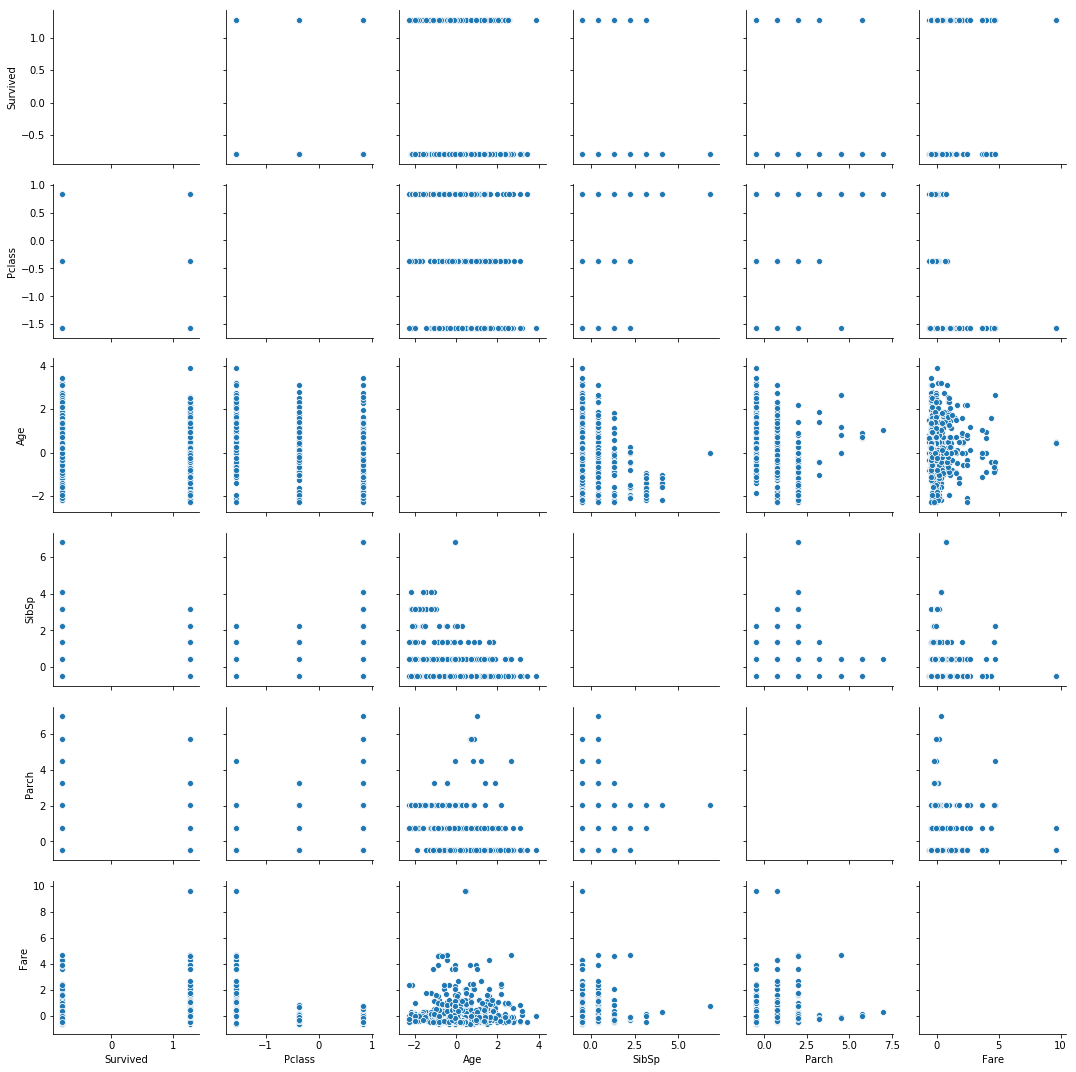

In [504]:
df2 = df.copy()
df2 = df[numeric.columns].astype(int)
std = df2.std(axis = 0)
mean = df2.mean(axis = 0)
df3 = (df2 - mean)/std

sns.pairplot(df3, vars = nominals, diag_kind = {'hist'})



#sns.pairplot(df2, vars = nominals, diag_kind = {'hist'})

In [473]:
normalized_X = preprocessing.normalize(df2, axis = 1 )

In [479]:
df3 = normalized_X

In [486]:
numeric.columns


Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [505]:
df3

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,-0.788829,0.826913,-0.579719,0.432550,-0.473408,-0.498667
2,1.266279,-1.565228,0.649747,0.432550,-0.473408,0.788962
3,1.266279,0.826913,-0.272352,-0.474279,-0.473408,-0.498667
4,1.266279,-1.565228,0.419222,0.432550,-0.473408,0.426816
5,-0.788829,0.826913,0.419222,-0.474279,-0.473408,-0.478548
6,-0.788829,0.826913,-0.041827,-0.474279,-0.473408,-0.478548
7,-0.788829,-1.565228,1.879213,-0.474279,-0.473408,0.386578
8,-0.788829,0.826913,-2.116552,2.246209,0.767199,-0.216998
9,1.266279,0.826913,-0.195511,-0.474279,2.007806,-0.418191
